In [1]:
import numpy as np
from data_utils import *

Using TensorFlow backend.


# Load Data

In [2]:
IMG_HEIGHT = 384
IMG_WIDTH = 256
BATCH_SIZE = 8

x_train = np.load('dataset/x_train.npy').astype(np.float32)
x_test = np.load('dataset/x_test.npy').astype(np.float32)
y_train = np.load('dataset/y_train_onehot.npy').astype(np.float32)
y_test = np.load('dataset/y_test_onehot.npy').astype(np.float32)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(900, 384, 256, 3) (900, 384, 256, 4)
(100, 384, 256, 3) (100, 384, 256, 4)


# Load DeepLab V2

In [3]:
from models.DeepLabV2 import *

In [4]:
model = DeepLabV2(img_shape = x_train[0].shape, num_of_class = 4,learning_rate = 2e-4)

In [5]:
model.show_model()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 384, 256, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 384, 256, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 384, 256, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 192, 128, 64) 0           block1_conv2[0][0]               
__________________________________________________________________________________________________
block2_con

# Train model

In [6]:
history = model.train_generator(x_train, y_train, 
                                x_test, y_test, 
                                'DeepLabV2_model',
                                epoch = 50,
                                batch_size = BATCH_SIZE)

Epoch 1/50
113/113 [==============================] - 134s 1s/step - loss: 0.9636 - acc: 0.5906 - val_loss: 0.5444 - val_acc: 0.7142

Epoch 00001: val_acc improved from -inf to 0.71419, saving model to ./save_model/DeepLabV2_model.h5
Epoch 2/50
113/113 [==============================] - 95s 845ms/step - loss: 0.4813 - acc: 0.8158 - val_loss: 0.4293 - val_acc: 0.8819

Epoch 00002: val_acc improved from 0.71419 to 0.88191, saving model to ./save_model/DeepLabV2_model.h5
Epoch 3/50
113/113 [==============================] - 82s 722ms/step - loss: 0.4098 - acc: 0.8678 - val_loss: 0.3897 - val_acc: 0.8125

Epoch 00003: val_acc did not improve from 0.88191
Epoch 4/50
113/113 [==============================] - 76s 670ms/step - loss: 0.3460 - acc: 0.8453 - val_loss: 0.2980 - val_acc: 0.8771

Epoch 00004: val_acc did not improve from 0.88191
Epoch 5/50
113/113 [==============================] - 77s 683ms/step - loss: 0.2543 - acc: 0.8996 - val_loss: 0.2449 - val_acc: 0.8997

Epoch 00005: val_ac


Epoch 00037: val_acc did not improve from 0.97210
Epoch 38/50
113/113 [==============================] - 93s 826ms/step - loss: 0.0377 - acc: 0.9850 - val_loss: 0.1073 - val_acc: 0.9714

Epoch 00038: val_acc did not improve from 0.97210
Epoch 39/50
113/113 [==============================] - 81s 716ms/step - loss: 0.0235 - acc: 0.9903 - val_loss: 0.1132 - val_acc: 0.9723

Epoch 00039: val_acc improved from 0.97210 to 0.97235, saving model to ./save_model/DeepLabV2_model.h5
Epoch 40/50
113/113 [==============================] - 75s 666ms/step - loss: 0.0200 - acc: 0.9917 - val_loss: 0.1228 - val_acc: 0.9727

Epoch 00040: val_acc improved from 0.97235 to 0.97267, saving model to ./save_model/DeepLabV2_model.h5
Epoch 41/50
113/113 [==============================] - 76s 673ms/step - loss: 0.0185 - acc: 0.9923 - val_loss: 0.1244 - val_acc: 0.9725

Epoch 00041: val_acc did not improve from 0.97267
Epoch 42/50
113/113 [==============================] - 84s 743ms/step - loss: 0.0182 - acc: 0.9

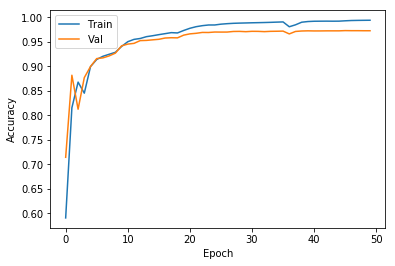

In [7]:
plot_acc(history)

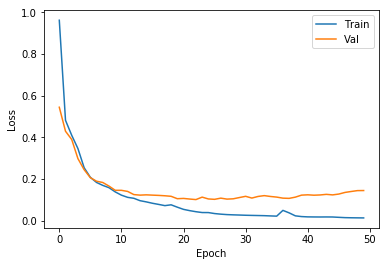

In [8]:
plot_loss(history)